# Linear Regression Assignment

## Bike Sharing Assignment 
   -By Kiran S. Dalmiya

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Data collection and Understanding the Data

   #### Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data
3. addressing null values,missing values
4. ensuring appropriate formats, adjusting data types if necessary, 
5. and eliminating unnecessary rows or columns. 

In [79]:
# Impporting libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Read the dataset 'day'
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [82]:
bike.shape

(730, 16)

In [83]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [85]:
#Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dataset contains No Missing values and No null values

In [86]:
# Cleaning the unnecessary columns /Extra Column /Duplicates

bike.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### No Duplicates coulmns are found


Here We can Remove following Columns from the bike dataset
1. instant  as it has only index numbers 
2. dteday   as it is a date column and not much of use in building the model
3. casual and 4. registered as their sum is a target variable and we dont need them seperately

In [87]:
#Creating new bike object
bike1= bike

In [88]:
bike1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
bike1=bike1.drop('instant',axis=1)

In [90]:
bike1=bike1.drop('dteday',axis=1)

In [91]:
bike1=bike1.drop('casual',axis=1)


In [92]:
bike1=bike1.drop('registered',axis=1)

In [93]:
bike1.shape

(730, 12)

In [94]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [102]:
#Displaying uniquw value of each column
bike1.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Here we can see that temp atemp hum windspeed and cnt are numerical columns while season yr mnth holiday weekday workingday and weathersit are category columns

so checking the missing values and outliers in numerical variable first

In [103]:
bike1.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### No Null Values are present in dataset

<Axes: ylabel='windspeed'>

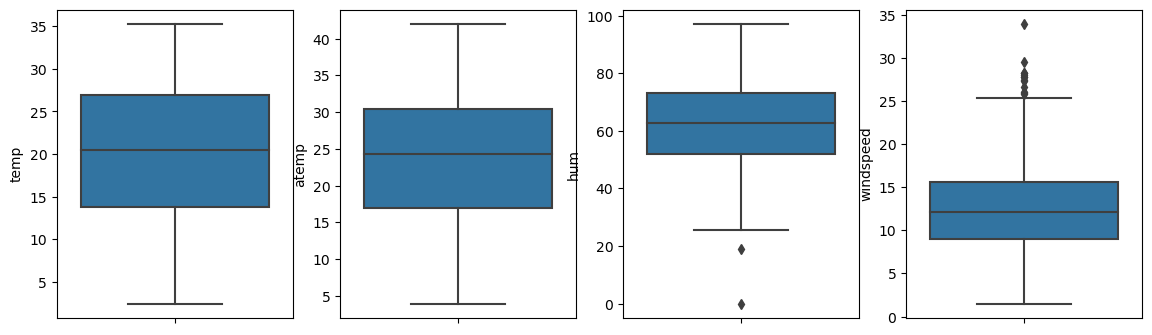

In [104]:
#Checking for outliers
plt.figure(figsize=(14,4),facecolor='white')
plt.subplot(1,4,1)
sns.boxplot(y='temp',data=bike1)
plt.subplot(1,4,2)
sns.boxplot(y='atemp',data=bike1)
plt.subplot(1,4,3)
sns.boxplot(y='hum',data=bike1)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed',data=bike1)

#### No Outliers to be handeled 

In [105]:
# Now converting columns with multiple category values to string values as mentioned in problem statement

In [106]:
bike1.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike1.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike1.mnth = bike1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike1.weekday = bike1.weekday.replace({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualising the Data /EDA
The most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

We will use univariate/bivariate /multivariate analysis for
1. Visualizing numerical variables using scatter or pairplots in order to interpret business /domain inferences.
2. Visualizing categorical variables using barplots  


#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 1200x2500 with 0 Axes>

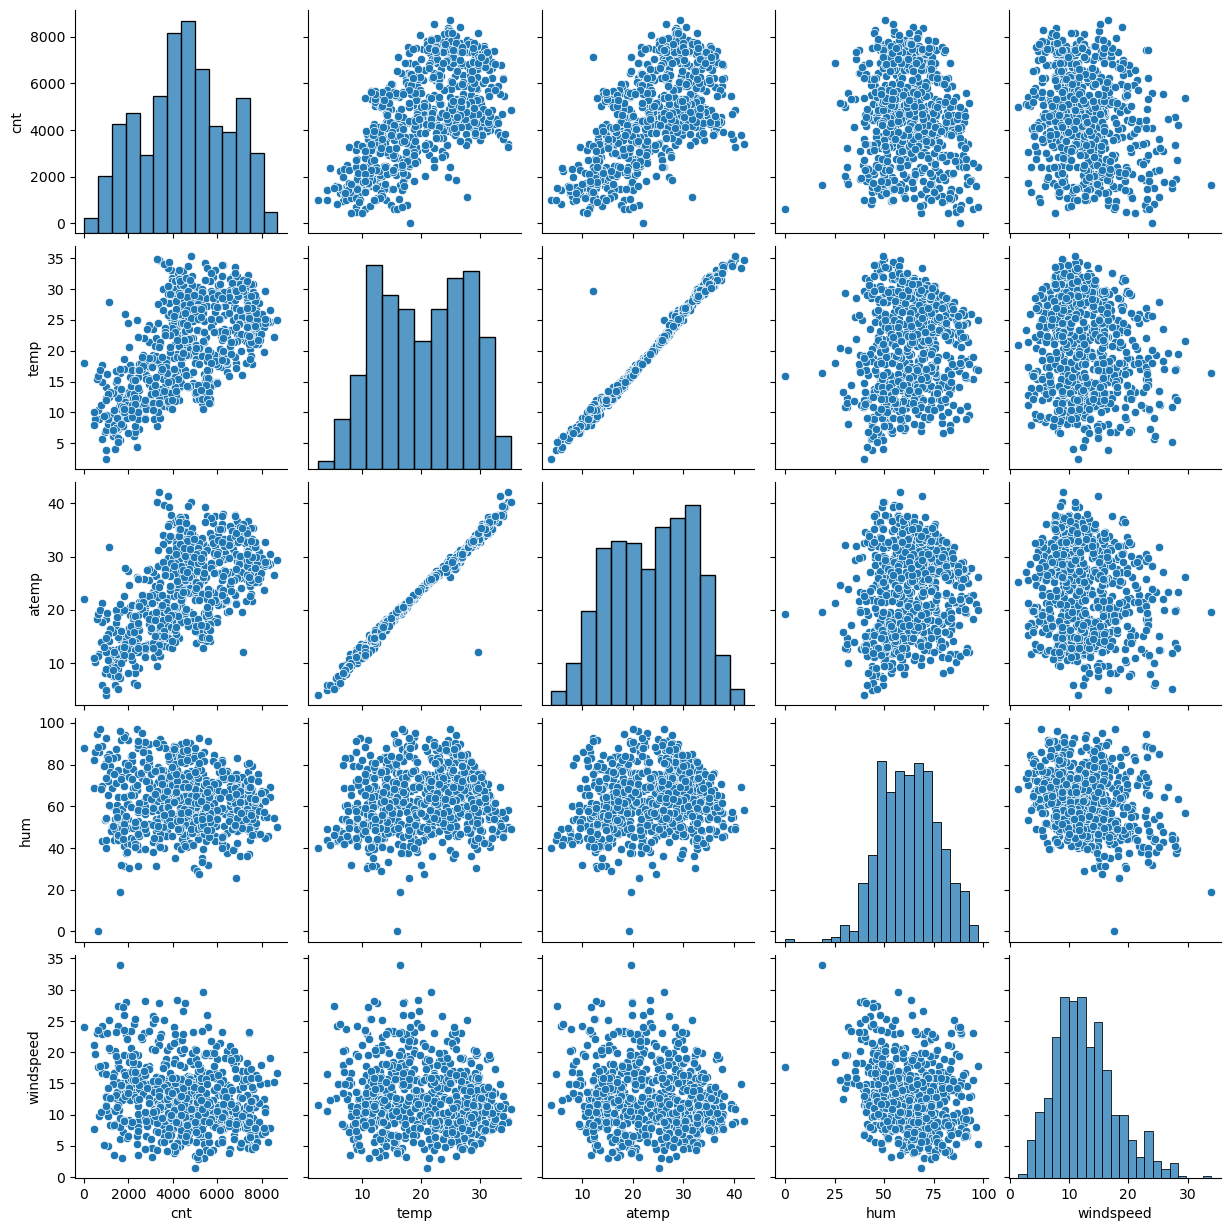

In [107]:
#Drawing pairplots for numeric variables

plt.figure(figsize = (12,25))
sns.pairplot(data=bike1,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

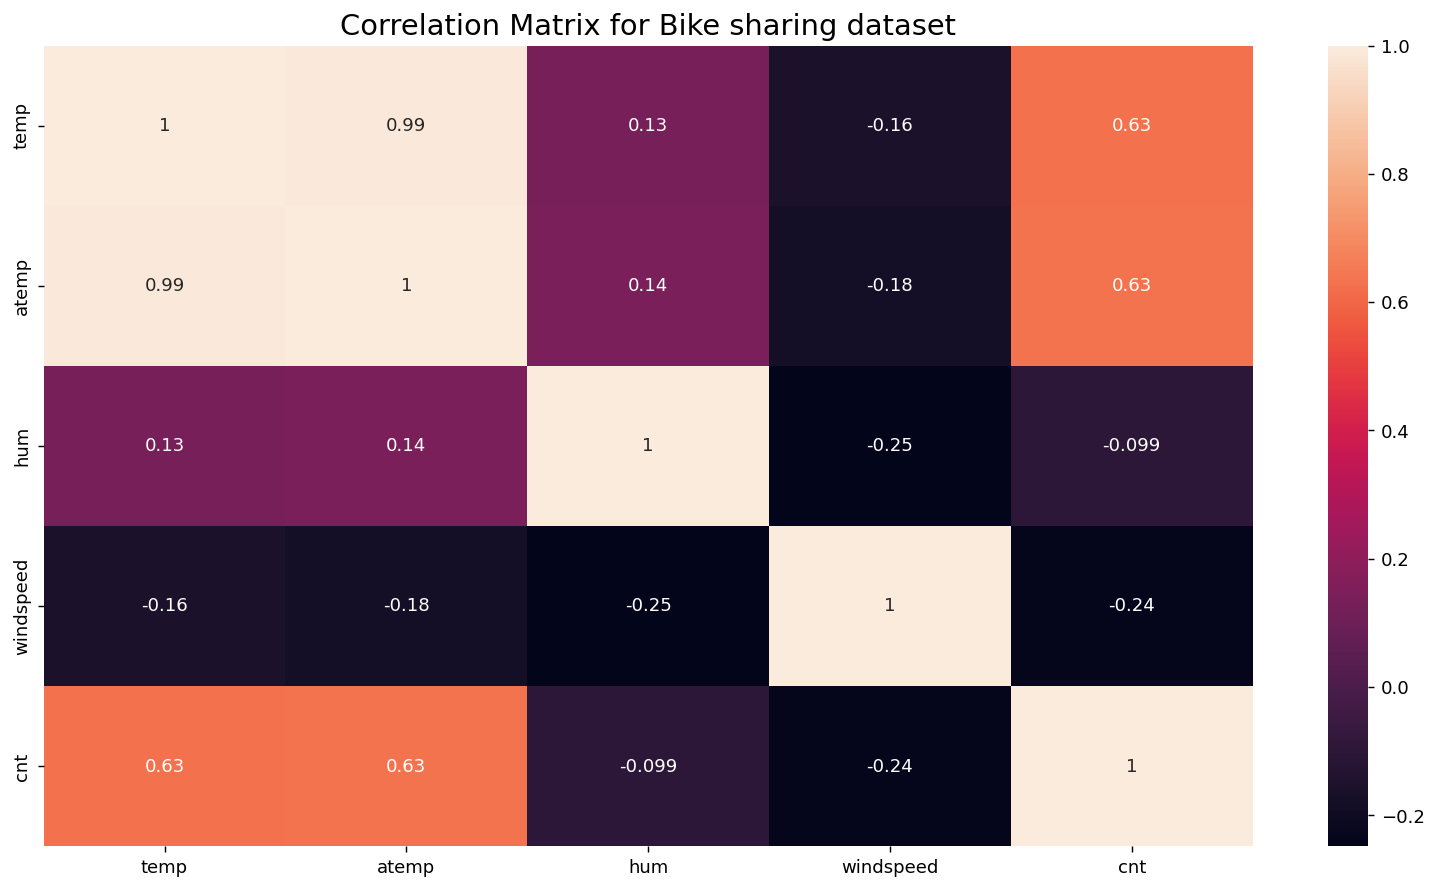

In [108]:
#Checking Heat map for numeric variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation Matrix for Bike sharing dataset",fontsize=16)
sns.heatmap(bike1[num_vars].corr(),annot= True)
plt.show()

#### Inference:

-By observing pair plots and heat map we can see that the temp and atemp has the highest corelation with the target variable cnt

-temp and atemp are highly co-related with each other

-output variable has a linear relationship with variables like temp, atemp.

#### Visualising Category Variables
Let's make a box plot for all the Category variables

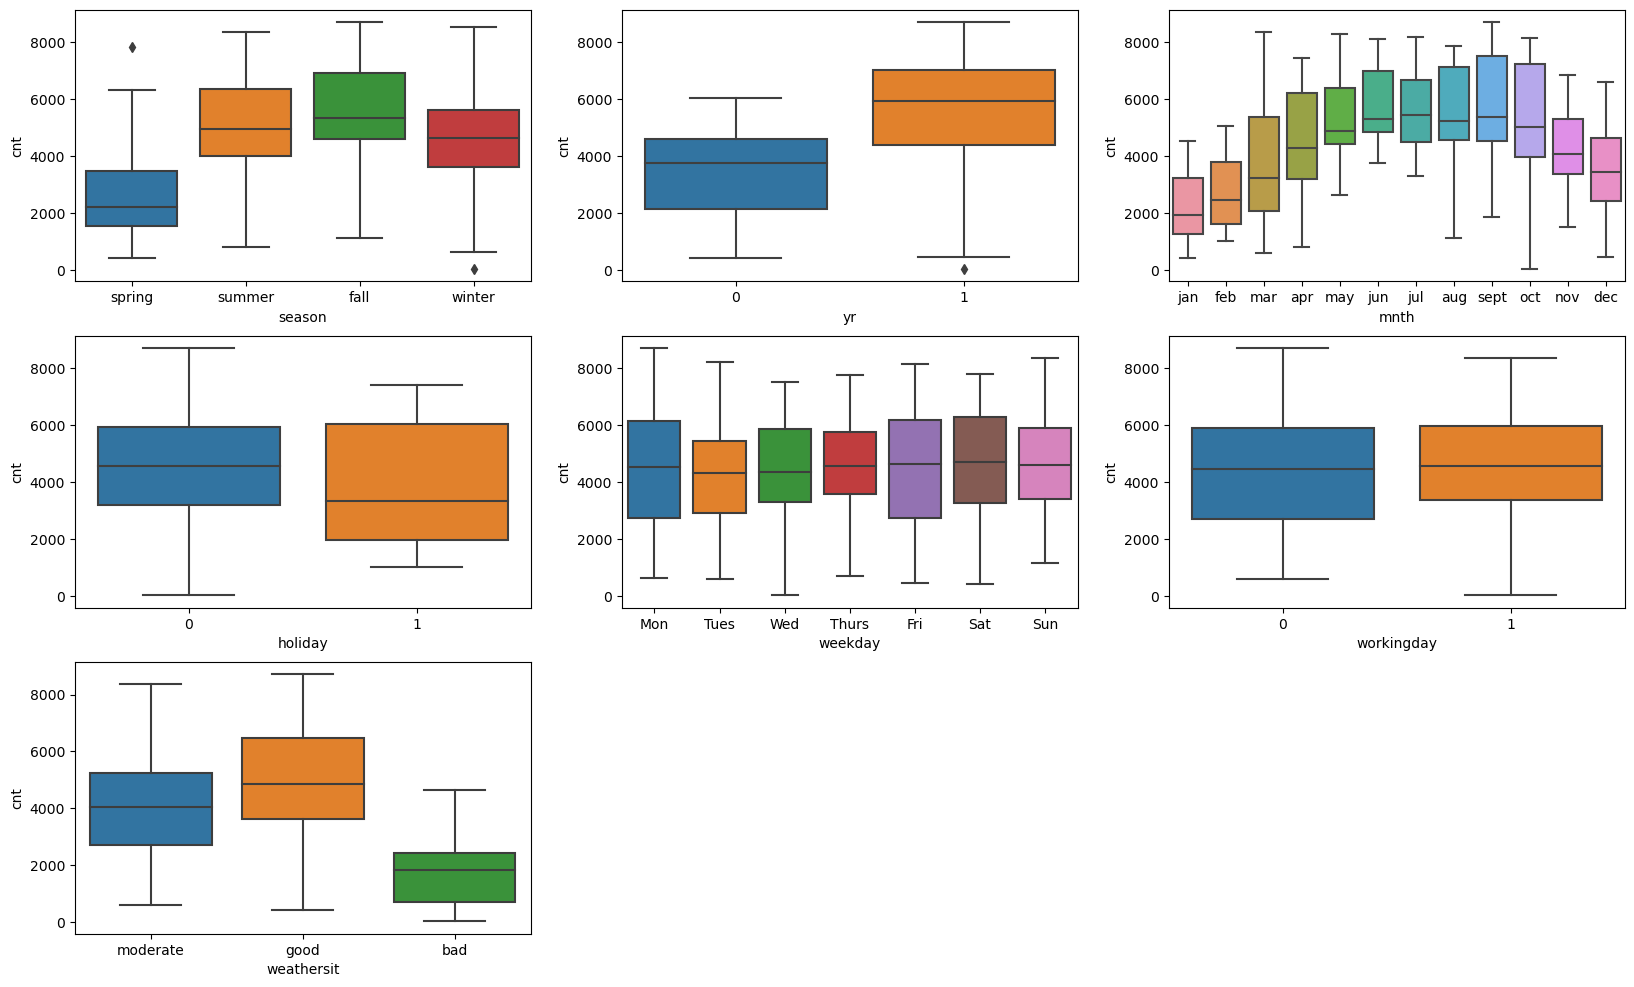

In [109]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike1)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y= 'cnt', data=bike1)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike1)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike1)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike1)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike1)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike1)
plt.show()

#### Inference:

1. fall Seoson has highest demand for rental bikes followed by summer ,winter and spring having the least demand.
2. There is an increase in bike demand for next year i.e. 2019 compare to last year i.e. 2018
3. September month has highest demand for bikes while November December Jaunuary and February has the least demand can be due to extreme weather conditions.
4. A holiday have a affected the mean demand negatively.
5. No proper inference about bike demand can be drawn from  Weekday.
6. People have higher demand of bike during clear weather situations and lowest during bad weathers

# Step 3 : Data Preparation for modeling 

Encoding: 

-Converting catagory variable with two values to 1s/0s.

-Creating Dummy Variable for other category variables

In [110]:
#converting catagory columns with object type to category type

bike1['season']=bike1['season'].astype('category')
bike1['mnth']=bike1['mnth'].astype('category')
bike1['weekday']=bike1['weekday'].astype('category')
bike1['weathersit']=bike1['weathersit'].astype('category')


In [111]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [112]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


here we dont have 'yes'/'no' columns 

and the columns 'yr','holliday' and 'workingday' are already having binary values 0s and 1s

#### Now Creating dummy variables for other category columns i.e. 'Season', 'mnth','weekday' and 'weathersit'

In [113]:
#Creating new dataset object bike 2 for dummy variables
bike2 = pd.get_dummies(data=bike1,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bike2

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,True,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,False,True,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,True,False,...,False,False,False,True,False,False,False,False,False,True
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,True,False,...,False,False,False,False,True,False,False,False,False,True
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,True,False,...,False,False,True,False,False,False,False,False,False,True
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,True,False,...,False,False,False,False,False,False,True,False,True,False


In [114]:
#replacing True with 1 and false with zero in dummy variable columns....changing category type to int type

dummy_col=['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_good', 'weathersit_moderate']

bike2[dummy_col]=bike2[dummy_col].astype(int)

bike2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    int32  
 9   season_summer        730 non-null    int32  
 10  season_winter        730 non-null    int32  
 11  mnth_aug             730 non-null    int32  
 12  mnth_dec             730 non-null    int32  
 13  mnth_feb             730 non-null    int32  
 14  mnth_jan             730 non-null    int32  
 15  mnth_jul             730 non-null    int

### Splitting data into training and test set

In [116]:
bike2.shape

(730, 30)

In [117]:
df_train,df_test=train_test_split(bike2,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Scalling the Features

In [118]:
#Instantiate an object
scaler=MinMaxScaler()

# Create a list of numeric variable need to be scaled
num_vars=['temp','atemp','hum','windspeed','cnt']

# fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


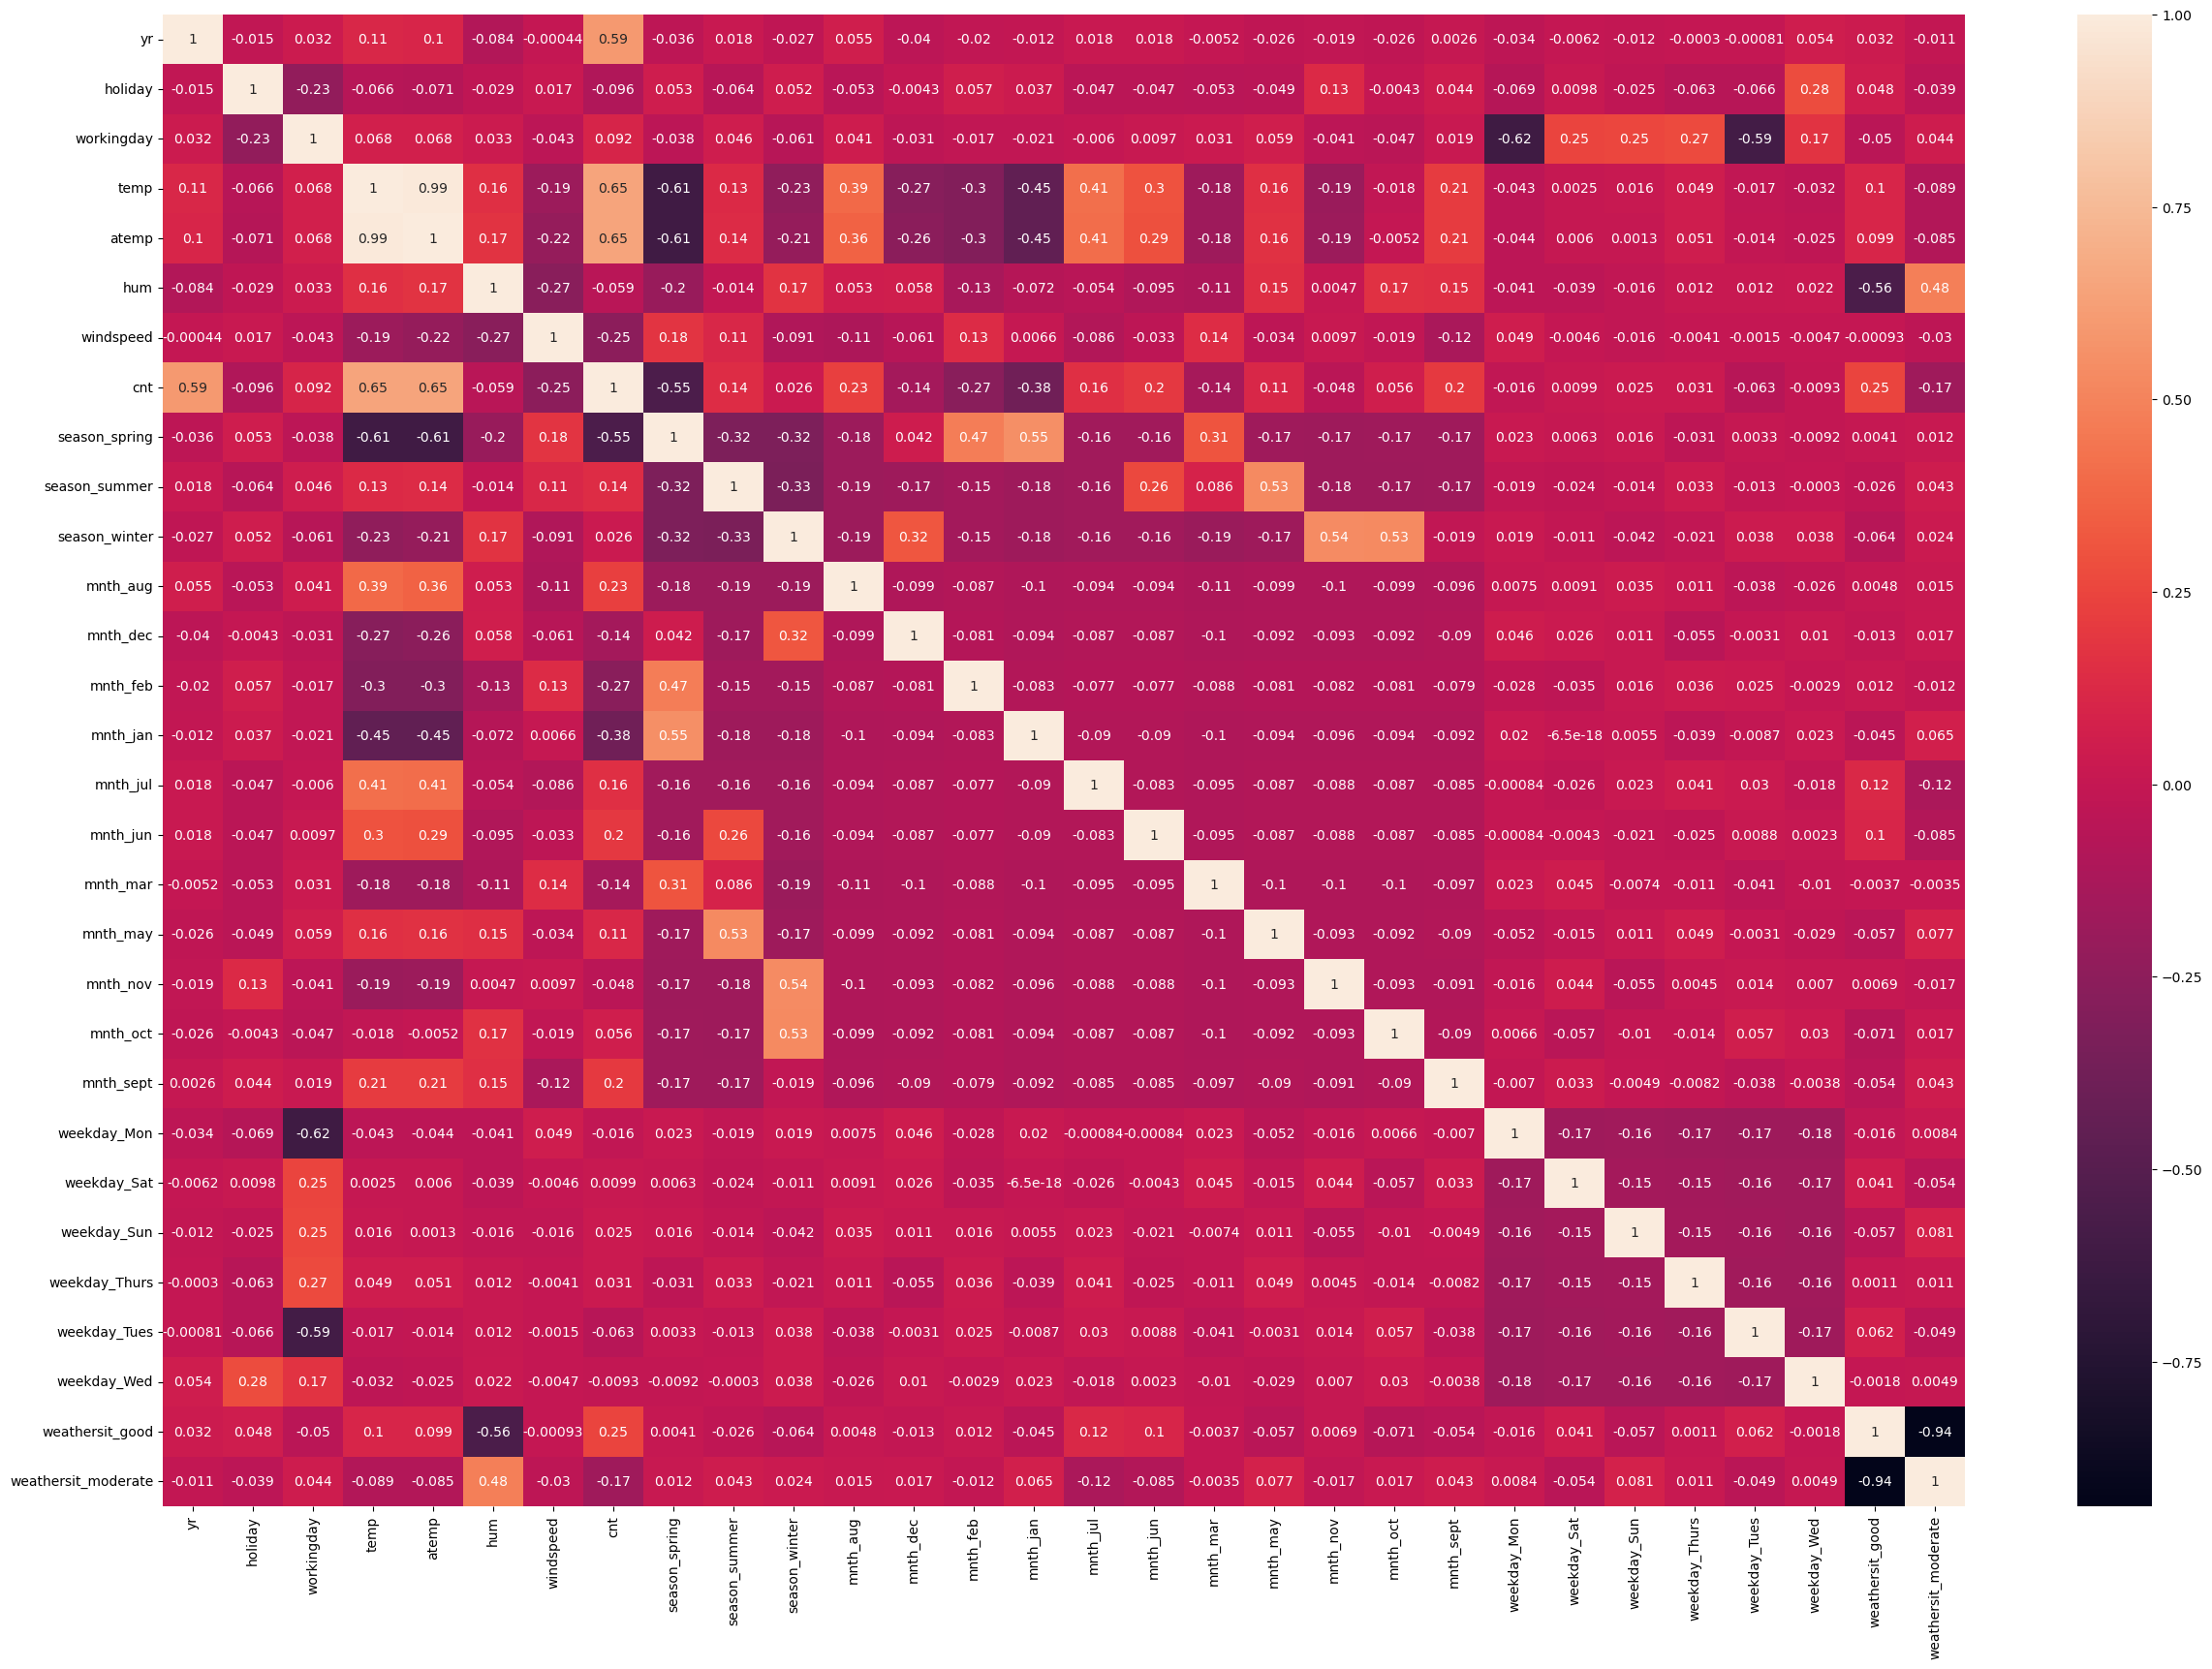

In [119]:
# printing the heat map for train variables
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [120]:
# Creating X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train


In [121]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [122]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# Step 4 : Building the model model

In [123]:
# Building model using RFE Approach 
# we have 29 feature varaiable so using RFE to eliminate some variables

# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()                               # Creating RFE object
lm.fit(X_train,y_train)                               # fitting train values to the object

rfe = RFE(estimator=lm, n_features_to_select=15)     #Running RFE
rfe = rfe.fit(X_train, y_train)  

In [124]:
#Dislaying selected feature by RFE and their ranking as 1
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 10),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 9),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [125]:
# columns upported by RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_Mon', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [126]:
# columns did not supported by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

## Building model using stats models, for the detailed statistics

In [127]:
# Creating X_train dataframe with rfe selected variables
X_train_rfe=X_train[col]


In [128]:
import statsmodels.api as sm

In [129]:
# add constant variable
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_Mon,weathersit_good,weathersit_moderate
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,1,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,1,0
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,0,1
79,1.0,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,1


In [130]:
#running linear model
lm= sm.OLS(y_train, X_train_rfe).fit()



In [131]:
# looking at the summary of linear model 1
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.22e-191
Time:                        11:35:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0044    

#### here mnth_jan p-values is 0.047 which is almost equal to 0.5 rest all the variables appears significant 

#### so we will also look at VIF now

In [132]:

#dropping the constant
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

In [133]:
# calculating the VIF for the model
# imported VIF from statsmodel above.
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,25.63
3,temp,22.84
13,weathersit_good,14.80
14,weathersit_moderate,9.07
6,season_spring,5.69
2,workingday,5.42
5,windspeed,4.69
8,season_winter,4.12
7,season_summer,3.21
0,yr,2.10


#### hum has a very high VIF so lets drop it.

In [134]:
X_train_rfe2=X_train_rfe.drop('hum',axis=1)

### Model 2

In [135]:
#Creating another model
X_train_rfe2=sm.add_constant(X_train_rfe2)
lm2= sm.OLS(y_train, X_train_rfe2).fit()
# looking at the summary of linear model 2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.60e-188
Time:                        11:35:36   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1171    

In [136]:
# calculating the VIF for the model2
X_train_rfe2=X_train_rfe2.drop(['const'],axis=1)
vif=pd.DataFrame()
X=X_train_rfe2
vif['Features']=X.columns
vif['VIF']=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
12,weathersit_good,14.79
3,temp,13.96
13,weathersit_moderate,8.48
2,workingday,5.34
4,windspeed,4.67
5,season_spring,4.48
6,season_summer,2.79
7,season_winter,2.74
0,yr,2.08
11,weekday_Mon,1.99


#### Again P values are significant but weathersit_good has a very high VIF so lets drop it.

In [137]:
X_train_rfe3=X_train_rfe2.drop('weathersit_good',axis=1)

### Model 3

In [138]:

#Creating model3
X_train_rfe3=sm.add_constant(X_train_rfe3)

lm3= sm.OLS(y_train, X_train_rfe3).fit()
# looking at the summary of linear model 2

print(lm3.summary())

# calculating the VIF for the model3 
X_train_rfe3=X_train_rfe3.drop(['const'],axis=1)
vif=pd.DataFrame()
X=X_train_rfe3
vif['Features']=X.columns
vif['VIF']=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.07e-162
Time:                        11:35:41   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1652    

#### here holiday has high p-value lets drop it 
#### here temp has a very high VIF but temp seems to be very important factor considering the business domain so we will not drop temp.


In [139]:
X_train_rfe4=X_train_rfe3.drop('holiday',axis=1)

###  MODEL 4

In [140]:
#Creating model4

#Adding constant
X_train_rfe4=sm.add_constant(X_train_rfe4)

lm4=sm.OLS(y_train,X_train_rfe4).fit()

# looking at the summary of linear model 4

print(lm4.summary())

# calculating the VIF for the model4
X_train_rfe4=X_train_rfe4.drop(['const'],axis=1)
vif=pd.DataFrame()
X=X_train_rfe4
vif['Features']=X.columns
vif['VIF']=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.27e-163
Time:                        11:35:43   Log-Likelihood:                 444.62
No. Observations:                 510   AIC:                            -863.2
Df Residuals:                     497   BIC:                            -808.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1584    

#### here now p-value of mnth_jan is not significant;lets drop variable mnth_jan

In [141]:
X_train_rfe5=X_train_rfe4.drop(['mnth_jan'],axis=1)

### MODEL 5

In [142]:
#adding constant

X_train_rfe5=sm.add_constant(X_train_rfe5)

lm5=sm.OLS(y_train,X_train_rfe5).fit()

# printing the summary of model 5

print(lm5.summary())

# Creating VIF for model 5

#remove constant
X_train_rfe5=X_train_rfe5.drop(['const'],axis=1)
vif=pd.DataFrame()
X=X_train_rfe5
vif['Features']=X.columns
vif['VIF']=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.73e-163
Time:                        11:35:47   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1440    

####  Insight :
- Now this model looks good, as the p-values for all the predictors seems to be significant and there seems to be quite low Multicollinearity between the predictors. 

- For now, we will consider this as our final model

#### Final Model Interpretation

As per Hypothesis testing:
- H0:B1=B2=B3=B4...=Bn=0 
- H1:  at least one  Bi!=0

Our final Linear Regression model's coefficient values are as follows:


    const                   0.1440      
    yr                      0.2394      
    workingday              0.0463      
    temp                    0.5043      
    windspeed              -0.1794      
    season_spring          -0.0593      
    season_summer           0.0508      
    season_winter           0.0734      
    mnth_jul               -0.0518     
    mnth_sept               0.0648     
    weekday_sat             0.0581     
    weathersit_moderate    -0.0680  

#### It is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

#### F-statistic

The F-Statistics value of 175.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

#### The Equation for the model is :

**cnt** = 0.1440 + (**yr** × 0.2394) + (**workingday** × 0.0463 + (**temp** × 0.5043) − (**windspeed** × 0.1794) - (**season_spring** × 0.0593) + (**season_summer** ×0.0508)+ (**season_winter** ×0.0734) - (**mnth_jul** ×0.0518) + (**mnth_sept** ×0.0648) + (**weekday_sat** × 0.0581) − (**weathersit_moderate** ×0.0680)

### Interpretation of Coefficients:

**yr:** A coefficient value of ‘0.2394’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2394 units. so every year there is increase in business since last year.

**workingday:** A coefficient value of ‘0.0463’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.0463 units.

**temp:** A coefficient value of ‘0.5043’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5043 units.

**windspeed:** A coefficient value of ‘-0.1794’ is a negative values; indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1794 units.

**season_spring:** A coefficient value of ‘-0.0593’ is a negative value ,indicating a unit increase in season_spring variable decreases the bike hire numbers by 0.0593 units.


**season_summer:** A coefficient value of ‘0.0508’ indicated that , a unit increase in season_summer variable increases the bike hire numbers by 0.0508 units.

**season_winter:** A coefficient value of ‘0.0734’ indicated that , a unit increase in season_winter variable increases the bike hire numbers by 0.0734 units.

**mnth_jul:** A coefficient value of ‘-0.0518’ indicated that, a unit increase in mnth_jul variable decreases the bike hire numbers by 0.0518 units.

**mnth_sep:** A coefficient value of ‘0.0648’ indicated that, a unit increase in mnth_sep variable increases the bike hire numbers by 0.0648 units.

**weekday_sat:** A coefficient value of ‘0.0581’ indicats that, a unit increase in weekday_sat variable increases the bike hire numbers by 0.0581 units.


**weathersit_moderate:** A coefficient value of ‘-0.0680’ indicated that, a unit increase in variable, decreases the bike hire numbers by 0.0680 units.

**const:** The Constant value of ‘0.1440’ indicated that, in the absence of all other predictor variables (i.e.x1,x2...xn =0), The bike rental can still increase by 0.1440 units.

### ASSUMPTIONS 

   #### Error terms are normally distributed with mean zero 

# Step 5 : Residual analysis on training data

In [143]:
X_train_rfe5=sm.add_constant(X_train_rfe5)

In [144]:
# Residual Analysis Of Training Data
y_train_pred=lm5.predict(X_train_rfe5)
y_train_pred

576    0.741619
426    0.491568
728    0.328814
482    0.590074
111    0.279290
         ...   
578    0.831895
53     0.213317
350    0.255267
79     0.311502
520    0.650807
Length: 510, dtype: float64

<Axes: ylabel='Density'>

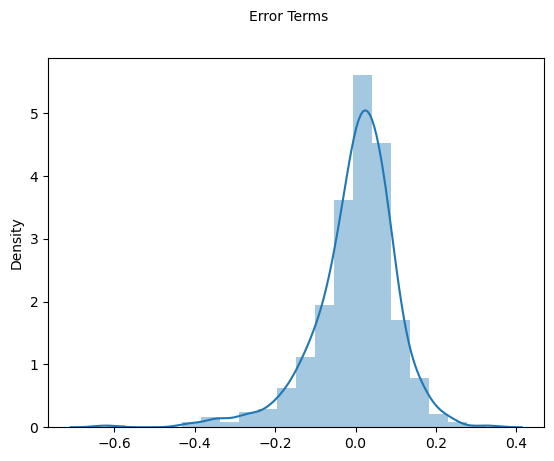

In [145]:

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
fig.suptitle('Error Terms', fontsize = 10)     
sns.distplot((res),bins=20)




- So we can see that the Error term distribution is centerd around zero and approximately a normal distribution,so our assumption is valid

#### checking Linear relationship between the dependent variable and a feature variable:
Here we will check for our top predictor variable  'temp'

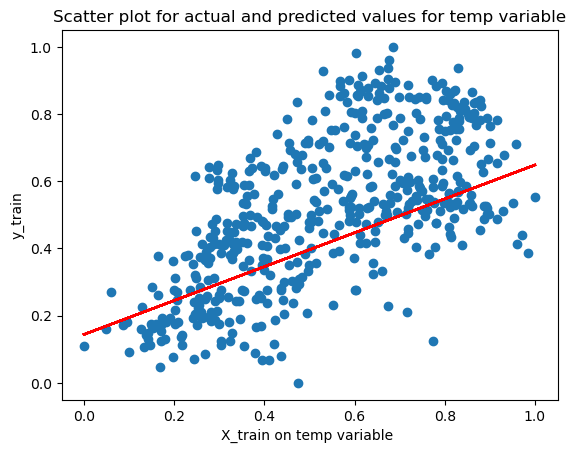

In [146]:

# Scatter plot for actual and predicted values on temp variable
plt.scatter(X_train.temp,y_train)
plt.plot(X_train,0.1440 +(0.5043 * X_train),'r')    # 0.1440 is a constant and 0.5043 is a coifficient of variable temp.
plt.xlabel('X_train on temp variable ')
plt.ylabel('y_train')
plt.title('Scatter plot for actual and predicted values for temp variable')
plt.show()

-So we can see from above graphs that there is a linear relationship between the dependent variable and the feature variable so our assumption is valid


# Step 6 : Prediction and evaluation on the test set

#### Scaling transformationon  the test Set

In [147]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,1,0


In [148]:

num_vars=['temp','atemp','hum','windspeed','cnt']

# we are only transforming the test set not fitting it .

df_test[num_vars]=scaler.transform(df_test[num_vars])

df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,1,0


In [149]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
y_test=df_test.pop('cnt')
X_test=df_test

In [151]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [152]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [153]:
X_train_rfe5=X_train_rfe5.drop(['const'],axis=1)

In [154]:
# selecting the column of X_test from final model
col_final=X_train_rfe5.columns
col_final
#X_test_sm=X_test_sm.drop()

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_Mon', 'weathersit_moderate'],
      dtype='object')

In [155]:
X_test=X_test[col_final]
X_test.head()


,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_Mon,weathersit_moderate
184,0,0,0.831783,0.084219,0,0,0,1,0,0,1
535,1,1,0.901354,0.153728,0,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,0,1,0,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,1,0,0,0,0,0


In [156]:
## Adding constant
X_test_lm=sm.add_constant(X_test)
X_test_lm.head()

,const,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_Mon,weathersit_moderate
184,1.0,0,0,0.831783,0.084219,0,0,0,1,0,0,1
535,1.0,1,1,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,0,1,0,0,0,0,0


In [157]:
# Making prediction on test model using final model lm5

y_test_pred=lm5.predict(X_test_lm)

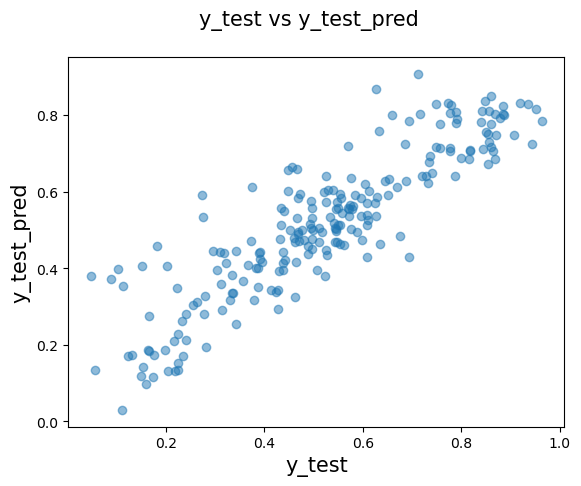

In [158]:
# evaluate the model
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_test_pred', fontsize = 15) 
plt.show()

####  R^2 value for Test set

In [159]:
from sklearn.metrics import r2_score
r2=r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7789795330321152

### Computing the Adjusted R^2 now

In [160]:
X_test.shape

(220, 11)

In [161]:
n=X_test.shape[0]  # number of rows in X_test
p=X_test.shape[1] # number of features variables

adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7672909506443906

##### Here R squared on test set is 0.7789 and we have seen R square on training set is 0.795
##### Here adjusted  R squared on test set is 0.7672 and we have seen adjusted R square on training set is 0.791

#### so we can say that what model have learned on training set; is very much able to generalised on the test set
#### It seems to be a pretty good model

### Final Observations :

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘‘0.5043’ indicated that a unit increase in temp variable increases the bike hire numbers by ‘0.5043 units. 



- **windspeed**: A coefficient value of ‘-0.1794’ is a negative values; indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1794 units.


- **Year (yr)** - A coefficient value of ‘0.2394’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2394 units. 


So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking


The next best features that can also be considered are 


- **season_winter:**  A coefficient value of ‘0.0734’ indicated that, a unit increase in winter variable increases the bike hire numbers by 0.0734 units. 
  People prefer to wait until the are not that high or extremly cold.



  
- **weathersit_moderate:** A coefficient value of ‘-0.0680’ indicated that, a unit increase in variable, decreases the bike hire numbers by 0.0680 units.



- **mnth_sep:** A coefficient value of ‘0.0648’ indicated that, a unit increase in mnth_sep variable increases the bike hire numbers by 0.0648 units. Mostly climate in September with plenty of warm sunshine and clear blue skies for most of the month.  September is a great month to have road trips as they balance the weather between warm and cold.

